<a href="https://colab.research.google.com/github/guillaumeovf/CarLoanDefault/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
#create a kaggle folder
!mkdir ~/.kaggle

# Go on kaggle > Account > Create New API token
# Save the json file in your laptop in a dedicated folder

# copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

# Datasets available here: 
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009
!unzip red-wine-quality-cortez-et-al-2009.zip

Saving kaggle.json to kaggle.json
  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 41.7MB/s]
Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [73]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
df['Y'] = np.where(df['quality']>= 7, 1, 0)
df['fixed_acidity_cat'] = np.where(df['fixed acidity']<= 8, 0, 1)
df['volatile_acidity_cat'] = np.where(df['volatile acidity']>= 0.4, 0, 1)

def citric_acid_cat(x):
  if x < 0.21 :
    return 'A'
  elif x < 0.3 :
    return 'B'
  else:
    return 'C'


df['citric_cat'] = df['citric acid'].apply(lambda x: citric_acid_cat(x))

temp = df.sample(n=150, random_state=893717398)
df = df.append(temp)
del(temp)
df.reset_index(drop=True, inplace=True)
df['pH2'] = np.where(df['pH'].index %15 ==0, np.nan, df['pH'])

rng = np.random.default_rng(893717398)
df = df.join(pd.Series(rng.normal(df['fixed acidity'].median(),1,len(df)), 
                       name='acidity_other'))


#fixed aciity + random afin de fair missing très fort
# rajouter date

In [70]:


#df['other_acidity'] = df['fixed acidity'] + 
np.random(df['fixed acidity'].median(), 1)

In [72]:
df.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Y,fixed_acidity_cat,volatile_acidity_cat,citric_cat,pH2,acidity_other
889,10.7,0.900,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5,0,1,0,C,3.22,8.873027
830,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.9,4,0,0,0,A,3.38,8.698403
1661,8.0,0.420,0.32,2.5,0.080,26.0,122.0,0.99801,3.22,1.07,9.7,5,0,0,0,C,3.22,6.328677
734,7.7,0.560,0.20,2.0,0.075,9.0,39.0,0.99870,3.48,0.62,9.3,5,0,0,0,A,3.48,7.406022
1652,12.0,0.630,0.50,1.4,0.071,6.0,26.0,0.99791,3.07,0.60,10.4,4,0,1,0,C,3.07,8.672647


In [36]:
import seaborn as sns

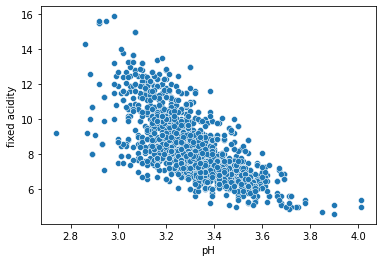

In [40]:
sns.scatterplot(data=df, x="pH", y="fixed acidity")